# **Exploratory Data Analysis (EDA) - Desembolsos Mensais do BNDES**

## **Importa bibliotecas**

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Importa dados como um DataFrame do Pandas**

In [3]:
df = pd.read_csv("./data/desembolsos-mensais.zip", encoding="UTF-8", sep=";", decimal=",")
df.head()

,ano,mes,forma_de_apoio,produto,instrumento_financeiro,inovacao,porte_de_empresa,regiao,uf,municipio,municipio_codigo,setor_cnae,subsetor_cnae_agrupado,setor_bndes,subsetor_bndes,desembolsos_reais
0,2010,9,DIRETA,BNDES MERCADO DE CAPITAIS,MERCADO DE CAPITAIS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,RIO DE JANEIRO,3304557,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,2.475354e+10
1,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,NORDESTE,PERNAMBUCO,IPOJUCA,2607208,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,9.889998e+09
2,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,DIVERSOS,9999998,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,9.409998e+09
3,2012,12,DIRETA,BNDES FINEM,PROINVESTE,NÃO,GRANDE,CENTRO OESTE,DISTRITO FEDERAL,DIVERSOS,9999998,COMÉRCIO E SERVIÇOS,ADMINISTRAÇÃO PÚBLICA,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,7.271079e+09
4,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,DIVERSOS,9999998,COMÉRCIO E SERVIÇOS,TRANSPORTE TERRESTRE,INFRAESTRUTURA,OUTROS TRANSPORTES,5.699997e+09


In [3]:
df.shape

(3244804, 16)

### **OBS: Podem ser usadas duas métricas para ordenar os dados:**
- `"sum"` >> Soma dos valores de uma categoria (valor total)
- `"proportional"` >> Valores totais divididos pelo número de ocorrências de uma categoria (média)

## **1- Desembolso por localidade**

### **1.1) Por região**

In [4]:
regiao_sort_metric = "proportional"

desembolso_por_regiao = df[["regiao", "desembolsos_reais"]].groupby(["regiao"]).agg(count=("desembolsos_reais", "count"), sum=("desembolsos_reais", "sum")).reset_index()
desembolso_por_regiao["proportional"] = desembolso_por_regiao["sum"]/desembolso_por_regiao["count"]
desembolso_por_regiao = desembolso_por_regiao.sort_values(by=regiao_sort_metric, ascending=False)
print("Desembolso por região:")
for _, row in desembolso_por_regiao.iterrows():
    print("{0:10} {1:20}".format(str(row['count']).strip(), str(row['regiao']).strip()), "R$ {:.2f}".format(round(row[regiao_sort_metric], 2)))

Desembolso por região:
147525     NORTE                R$ 843552.75
1244794    SUDESTE              R$ 779790.01
301302     CENTRO OESTE         R$ 644649.45
407992     NORDESTE             R$ 614295.24
1143191    SUL                  R$ 356220.30


### **1.2) Por UF**

In [5]:
uf_sort_metric = "proportional"

desembolso_por_uf = df[["uf", "regiao", "desembolsos_reais"]].groupby(["uf"]).agg(regiao=("regiao", "first"), count=("desembolsos_reais", "count"), sum=("desembolsos_reais", "sum")).reset_index()
desembolso_por_uf["proportional"] = desembolso_por_uf["sum"]/desembolso_por_uf["count"]
desembolso_por_uf = desembolso_por_uf.sort_values(by=uf_sort_metric, ascending=False)
print("Desembolso por UF:")
for _, row in desembolso_por_uf.iterrows():
    print("{0:10} {1:20} {2:25}".format(str(row['count']).strip(), str(row['regiao']).strip(), str(row['uf']).strip()), "R$ {:.2f}".format(round(row[uf_sort_metric], 2)))

Desembolso por UF:
12301      CENTRO OESTE         DISTRITO FEDERAL          R$ 3001759.49
100432     SUDESTE              RIO DE JANEIRO            R$ 2324640.03
51168      NORTE                PARA                      R$ 1123727.98
4891       NORTE                AMAPA                     R$ 860001.67
62532      NORDESTE             PERNAMBUCO                R$ 856703.25
17441      NORTE                AMAZONAS                  R$ 810456.76
669423     SUDESTE              SAO PAULO                 R$ 802020.07
33847      NORTE                RONDONIA                  R$ 786593.51
42944      NORDESTE             MARANHAO                  R$ 741329.06
25975      NORDESTE             RIO GRANDE DO NORTE       R$ 686877.02
135430     NORDESTE             BAHIA                     R$ 607741.24
61290      CENTRO OESTE         MATO GROSSO DO SUL        R$ 599940.84
109750     CENTRO OESTE         MATO GROSSO               R$ 585780.23
29529      NORTE                TOCANTINS              

### **1.3) Por município**

In [6]:
municipio_sort_metric = "proportional"

desembolso_por_municipio = df[["municipio", "uf", "regiao", "desembolsos_reais"]].groupby(["municipio"]).agg(uf=("uf", "first"), regiao=("regiao", "first"), count=("desembolsos_reais", "count"), sum=("desembolsos_reais", "sum")).reset_index()
desembolso_por_municipio["proportional"] = desembolso_por_municipio["sum"]/desembolso_por_municipio["count"]
desembolso_por_municipio = desembolso_por_municipio.sort_values(by=municipio_sort_metric, ascending=False)
print("Desembolso por município:")
for _, row in desembolso_por_municipio.iterrows():
    print("{0:10} {1:25} {2:32}".format(str(row['count']).strip(), str(row['uf']).strip(), str(row['municipio']).strip()), "R$ {:.2f}".format(round(row[municipio_sort_metric], 2)))

Desembolso por município:
4          PIAUI                     CURRAL NOVO DO PIAUI             R$ 207048334.10
4          PIAUI                     CALDEIRAO GRANDE DO PIAUI        R$ 41237176.18
12         PIAUI                     MARCOLANDIA                      R$ 38731658.52
113        TOCANTINS                 AGUIARNOPOLIS                    R$ 30189605.18
17         RIO GRANDE DO NORTE       PEDRA GRANDE                     R$ 27910210.86
39         RIO GRANDE DO NORTE       PARAZINHO                        R$ 24540534.91
49         AMAPA                     FERREIRA GOMES                   R$ 22846035.75
58         BAHIA                     UMBURANAS                        R$ 21788886.09
29         RIO GRANDE DO NORTE       SERRA DO MEL                     R$ 19474923.75
1113       PERNAMBUCO                IPOJUCA                          R$ 19254290.14
42         BAHIA                     GENTIO DO OURO                   R$ 17600106.45
43         RIO GRANDE DO NORTE       A

## **2- Desembolso por porte de empresa**

### **2.1) Apenas por porte de empresa**

In [7]:
porte_sort_metric = "proportional"

desembolso_por_porte = df[["porte_de_empresa", "desembolsos_reais"]].groupby(["porte_de_empresa"]).agg(count=("desembolsos_reais", "count"), sum=("desembolsos_reais", "sum")).reset_index()
desembolso_por_porte["proportional"] = desembolso_por_porte["sum"]/desembolso_por_porte["count"]
desembolso_por_porte = desembolso_por_porte.sort_values(by=porte_sort_metric, ascending=False)
print("Desembolso por porte de empresa:")
for _, row in desembolso_por_porte.iterrows():
    print("{0:10} {1:15}".format(str(row['count']).strip(), str(row['porte_de_empresa']).strip()), "R$ {:.2f}".format(round(row[porte_sort_metric], 2)))

Desembolso por porte de empresa:
266732     GRANDE          R$ 5086584.44
334967     MÉDIA           R$ 565015.45
699529     PEQUENA         R$ 211086.35
1943576    MICRO           R$ 130447.79


### **2.2) Por porte de empresa e município**

In [8]:
porte_municipio_sort_metric = "proportional"

desembolso_por_porte_municipio = df[["porte_de_empresa", "municipio", "uf", "regiao", "desembolsos_reais"]].groupby(["porte_de_empresa", "municipio"]).agg(uf=("uf", "first"), regiao=("regiao", "first"), count=("desembolsos_reais", "count"), sum=("desembolsos_reais", "sum")).reset_index()
desembolso_por_porte_municipio["proportional"] = desembolso_por_porte_municipio["sum"]/desembolso_por_porte_municipio["count"]
desembolso_por_porte_municipio = desembolso_por_porte_municipio.sort_values(by=porte_municipio_sort_metric, ascending=False)
print("Desembolso por porte de empresa e município:")
for _, row in desembolso_por_porte_municipio.iterrows():
    print("{0:10} {1:15} {2:32} {3:32}".format(str(row['count']).strip(), str(row['porte_de_empresa']).strip(), str(row['uf']).strip(), str(row['municipio']).strip()), "R$ {:.2f}".format(round(row[porte_municipio_sort_metric], 2)))

Desembolso por porte de empresa e município:
2          GRANDE          BAHIA                            UMBURANAS                        R$ 630000000.00
5          GRANDE          MARANHAO                         SANTO ANTONIO DOS LOPES          R$ 232393938.03
4          GRANDE          PIAUI                            CURRAL NOVO DO PIAUI             R$ 207048334.10
8          MÉDIA           RIO DE JANEIRO                   SAO JOAO DA BARRA                R$ 179188491.25
1          GRANDE          PIAUI                            CALDEIRAO GRANDE DO PIAUI        R$ 164684399.99
2          GRANDE          BAHIA                            OLIVEIRA DOS BREJINHOS           R$ 164515333.50
6          GRANDE          PARA                             OURILANDIA DO NORTE              R$ 155435364.21
5          GRANDE          RIO GRANDE DO NORTE              AFONSO BEZERRA                   R$ 131409393.68
6          GRANDE          BAHIA                            GENTIO DO OURO         

### **2.3) Por porte de empresa e setor de atuação**

#### **2.3.1) Setor CNAE**

In [9]:
porte_setor_cnae_sort_metric = "proportional"

desembolso_por_porte_setor_cnae = df[["porte_de_empresa", "setor_cnae", "desembolsos_reais"]].groupby(["porte_de_empresa", "setor_cnae"]).agg(count=("desembolsos_reais", "count"), sum=("desembolsos_reais", "sum")).reset_index()
desembolso_por_porte_setor_cnae["proportional"] = desembolso_por_porte_setor_cnae["sum"]/desembolso_por_porte_setor_cnae["count"]
desembolso_por_porte_setor_cnae = desembolso_por_porte_setor_cnae.sort_values(by=porte_setor_cnae_sort_metric, ascending=False)
print("Desembolso por porte de empresa e setor CNAE:")
for _, row in desembolso_por_porte_setor_cnae.iterrows():
    print("{0:10} {1:15} {2:32}".format(str(row['count']).strip(), str(row['porte_de_empresa']).strip(), str(row['setor_cnae']).strip()), "R$ {:.2f}".format(round(row[porte_setor_cnae_sort_metric], 2)))

Desembolso por porte de empresa e setor CNAE:
2874       GRANDE          INDÚSTRIA EXTRATIVA              R$ 9258596.66
124678     GRANDE          COMÉRCIO E SERVIÇOS              R$ 5903625.70
120471     GRANDE          INDÚSTRIA DE TRANSFORMAÇÃO       R$ 4687424.67
18709      GRANDE          AGROPECUÁRIA                     R$ 1571150.29
27358      MÉDIA           AGROPECUÁRIA                     R$ 824920.35
193287     MÉDIA           COMÉRCIO E SERVIÇOS              R$ 631987.99
3576       MÉDIA           INDÚSTRIA EXTRATIVA              R$ 470284.93
98253      PEQUENA         AGROPECUÁRIA                     R$ 420470.33
110746     MÉDIA           INDÚSTRIA DE TRANSFORMAÇÃO       R$ 386980.65
5229       PEQUENA         INDÚSTRIA EXTRATIVA              R$ 289036.36
416257     PEQUENA         COMÉRCIO E SERVIÇOS              R$ 202366.59
575744     MICRO           AGROPECUÁRIA                     R$ 197418.00
7117       MICRO           INDÚSTRIA EXTRATIVA              R$ 145887.93
9

#### **2.3.2) Subsetor CNAE**

In [10]:
porte_subsetor_cnae_sort_metric = "proportional"

desembolso_por_porte_subsetor_cnae = df[["porte_de_empresa", "setor_cnae", "subsetor_cnae_agrupado", "desembolsos_reais"]].groupby(["porte_de_empresa", "subsetor_cnae_agrupado"]).agg(setor_cnae=("setor_cnae", "first"), count=("desembolsos_reais", "count"), sum=("desembolsos_reais", "sum")).reset_index()
desembolso_por_porte_subsetor_cnae["proportional"] = desembolso_por_porte_subsetor_cnae["sum"]/desembolso_por_porte_subsetor_cnae["count"]
desembolso_por_porte_subsetor_cnae = desembolso_por_porte_subsetor_cnae.sort_values(by=porte_subsetor_cnae_sort_metric, ascending=False)
print("Desembolso por porte de empresa e subsetor CNAE:")
for _, row in desembolso_por_porte_subsetor_cnae.iterrows():
    print("{0:10} {1:15} {2:32} {3:32}".format(str(row['count']).strip(), str(row['porte_de_empresa']).strip(), str(row['setor_cnae']).strip(), str(row['subsetor_cnae_agrupado']).strip()), "R$ {:.2f}".format(round(row[porte_subsetor_cnae_sort_metric], 2)))

Desembolso por porte de empresa e subsetor CNAE:
1440       GRANDE          INDÚSTRIA DE TRANSFORMAÇÃO       OUTROS EQUIP TRANSPORTE          R$ 65970193.30
7545       GRANDE          COMÉRCIO E SERVIÇOS              ELETRICIDADE E GÁS               R$ 32333688.88
2488       GRANDE          COMÉRCIO E SERVIÇOS              TELECOMUNICAÇÕES                 R$ 21682484.89
271        GRANDE          COMÉRCIO E SERVIÇOS              TRANSPORTE AÉREO                 R$ 20937844.49
1170       GRANDE          COMÉRCIO E SERVIÇOS              TRANSPORTE AQUAVIÁRIO            R$ 16032966.99
6266       GRANDE          INDÚSTRIA DE TRANSFORMAÇÃO       COQUE, PETRÓLEO E COMBUSTÍVEL    R$ 13670680.98
4904       GRANDE          COMÉRCIO E SERVIÇOS              ADMINISTRAÇÃO PÚBLICA            R$ 12714574.95
349        GRANDE          COMÉRCIO E SERVIÇOS              ARTES, CULTURA E ESPORTE         R$ 11676091.24
6866       GRANDE          INDÚSTRIA DE TRANSFORMAÇÃO       VEÍCULO, REBOQUE E CARROCER

#### **2.3.3) Setor BNDES**

In [11]:
porte_setor_bndes_sort_metric = "proportional"

desembolso_por_porte_setor_bndes = df[["porte_de_empresa", "setor_bndes", "desembolsos_reais"]].groupby(["porte_de_empresa", "setor_bndes"]).agg(count=("desembolsos_reais", "count"), sum=("desembolsos_reais", "sum")).reset_index()
desembolso_por_porte_setor_bndes["proportional"] = desembolso_por_porte_setor_bndes["sum"]/desembolso_por_porte_setor_bndes["count"]
desembolso_por_porte_setor_bndes = desembolso_por_porte_setor_bndes.sort_values(by=porte_setor_bndes_sort_metric, ascending=False)
print("Desembolso por porte de empresa e setor BNDES:")
for _, row in desembolso_por_porte_setor_bndes.iterrows():
    print("{0:10} {1:15} {2:32}".format(str(row['count']).strip(), str(row['porte_de_empresa']).strip(), str(row['setor_bndes']).strip()), "R$ {:.2f}".format(round(row[porte_setor_bndes_sort_metric], 2)))

Desembolso por porte de empresa e setor BNDES:
56508      GRANDE          INFRAESTRUTURA                   R$ 9272151.71
123345     GRANDE          INDUSTRIA                        R$ 4793935.26
68170      GRANDE          COMÉRCIO E SERVIÇOS              R$ 3111361.26
18709      GRANDE          AGROPECUÁRIA                     R$ 1571150.29
69132      MÉDIA           INFRAESTRUTURA                   R$ 1083751.57
27358      MÉDIA           AGROPECUÁRIA                     R$ 824920.35
98253      PEQUENA         AGROPECUÁRIA                     R$ 420470.33
114322     MÉDIA           INDUSTRIA                        R$ 389586.41
124155     MÉDIA           COMÉRCIO E SERVIÇOS              R$ 380436.94
117255     PEQUENA         INFRAESTRUTURA                   R$ 360688.38
278701     MICRO           INFRAESTRUTURA                   R$ 210967.18
575744     MICRO           AGROPECUÁRIA                     R$ 197418.00
299002     PEQUENA         COMÉRCIO E SERVIÇOS              R$ 140279.97

#### **2.3.4) Subsetor BNDES**

In [12]:
porte_subsetor_bndes_sort_metric = "proportional"

desembolso_por_porte_subsetor_bndes = df[["porte_de_empresa", "setor_bndes", "subsetor_bndes", "desembolsos_reais"]].groupby(["porte_de_empresa", "subsetor_bndes"]).agg(setor_bndes=("setor_bndes", "first"), count=("desembolsos_reais", "count"), sum=("desembolsos_reais", "sum")).reset_index()
desembolso_por_porte_subsetor_bndes["proportional"] = desembolso_por_porte_subsetor_bndes["sum"]/desembolso_por_porte_subsetor_bndes["count"]
desembolso_por_porte_subsetor_bndes = desembolso_por_porte_subsetor_bndes.sort_values(by=porte_subsetor_cnae_sort_metric, ascending=False)
print("Desembolso por porte de empresa e subsetor BNDES:")
for _, row in desembolso_por_porte_subsetor_bndes.iterrows():
    print("{0:10} {1:15} {2:32} {3:32}".format(str(row['count']).strip(), str(row['porte_de_empresa']).strip(), str(row['setor_bndes']).strip(), str(row['subsetor_bndes']).strip()), "R$ {:.2f}".format(round(row[porte_subsetor_bndes_sort_metric], 2)))

Desembolso por porte de empresa e subsetor BNDES:
7230       GRANDE          INFRAESTRUTURA                   ENERGIA ELÉTRICA                 R$ 32853144.57
940        GRANDE          INFRAESTRUTURA                   TRANSPORTE FERROVIÁRIO           R$ 31871715.34
1924       GRANDE          INFRAESTRUTURA                   OUTROS TRANSPORTES               R$ 31130668.00
2486       GRANDE          INFRAESTRUTURA                   TELECOMUNICAÇÕES                 R$ 21699099.56
8306       GRANDE          INDUSTRIA                        MATERIAL DE TRANSPORTE           R$ 20265391.06
1528       GRANDE          INFRAESTRUTURA                   CONSTRUÇÃO                       R$ 11972509.36
2874       GRANDE          INDUSTRIA                        EXTRATIVA                        R$ 9258596.66
15287      GRANDE          INDUSTRIA                        QUÍMICA E PETROQUÍMICA           R$ 7867063.45
5080       GRANDE          INDUSTRIA                        CELULOSE E PAPEL            

## **3- Indicador de inovação**

### **3.1) Indicador de inovação por setor de atuação**

In [4]:
inovativos = df[["inovacao", "setor_cnae", "subsetor_cnae_agrupado", "setor_bndes", "subsetor_bndes"]]
inovativos = inovativos.loc[inovativos["inovacao"] == "SIM"]
inovativos.value_counts()

inovacao  setor_cnae                      subsetor_cnae_agrupado           setor_bndes          subsetor_bndes         
SIM       AGROPECUÁRIA                    AGROPECUÁRIA                     AGROPECUÁRIA         AGROPECUÁRIA               6050
          COMÉRCIO E SERVIÇOS             INFORMAÇÃO E COMUNICAÇÃO         COMÉRCIO E SERVIÇOS  COMÉRCIO E SERVIÇOS         851
                                          ATIV IMOBIL, PROFISSIONAL E ADM  COMÉRCIO E SERVIÇOS  COMÉRCIO E SERVIÇOS         683
                                          COMÉRCIO                         COMÉRCIO E SERVIÇOS  COMÉRCIO E SERVIÇOS         619
                                          ATIV FINANCEIRA E SEGURO         COMÉRCIO E SERVIÇOS  COMÉRCIO E SERVIÇOS         378
          INDÚSTRIA DE TRANSFORMAÇÃO      VEÍCULO, REBOQUE E CARROCERIA    INDUSTRIA            MATERIAL DE TRANSPORTE      305
                                          FARMOQUÍMICO, FARMACÊUTICO       INDUSTRIA            QUÍMICA E PETROQ

### **3.2) Desembolso apenas por indicador de inovação**

In [5]:
inovacao_sort_metric = "proportional"

desembolso_por_inovacao = df[["inovacao", "desembolsos_reais"]].groupby(["inovacao"]).agg(count=("desembolsos_reais", "count"), sum=("desembolsos_reais", "sum")).reset_index()
desembolso_por_inovacao["proportional"] = desembolso_por_inovacao["sum"]/desembolso_por_inovacao["count"]
desembolso_por_inovacao = desembolso_por_inovacao.sort_values(by=inovacao_sort_metric, ascending=False)
print("Desembolso por indicador de inovação:")
for _, row in desembolso_por_inovacao.iterrows():
    print("{0:10} {1:10}".format(str(row['count']).strip(), str(row['inovacao']).strip()), "R$ {:.2f}".format(round(row[inovacao_sort_metric], 2)))

Desembolso por indicador de inovação:
11388      SIM        R$ 3304619.40
3022386    NÃO        R$ 592118.37


### **3.3) Desembolso por indicador de inovação e porte de empresa**

In [15]:
inovacao_porte_sort_metric = "proportional"

desembolso_por_inovacao_porte = df[["inovacao", "porte_de_empresa", "desembolsos_reais"]].groupby(["inovacao", "porte_de_empresa"]).agg(count=("desembolsos_reais", "count"), sum=("desembolsos_reais", "sum")).reset_index()
desembolso_por_inovacao_porte["proportional"] = desembolso_por_inovacao_porte["sum"]/desembolso_por_inovacao_porte["count"]
desembolso_por_inovacao_porte = desembolso_por_inovacao_porte.sort_values(by=inovacao_porte_sort_metric, ascending=False)
print("Desembolso por indicador de inovação e porte de empresa:")
for _, row in desembolso_por_inovacao_porte.iterrows():
    print("{0:10} {1:10} {2:15}".format(str(row['count']).strip(), str(row['inovacao']).strip(), str(row['porte_de_empresa']).strip()), "R$ {:.2f}".format(round(row[inovacao_porte_sort_metric], 2)))

Desembolso por indicador de inovação e porte de empresa:
2964       SIM        GRANDE          R$ 10221534.01
209470     NÃO        GRANDE          R$ 5857564.62
1541       SIM        MÉDIA           R$ 1612373.53
2428       SIM        PEQUENA         R$ 792981.57
4455       SIM        MICRO           R$ 656869.14
317412     NÃO        MÉDIA           R$ 571378.81
682517     NÃO        PEQUENA         R$ 210311.28
1812987    NÃO        MICRO           R$ 131122.12


## **4- Produção Agrícola Municipal (PAM)**

### **4.1) Importação dos dados**

In [6]:
PAM = pd.read_csv("./data/PAM.zip", sep=";")
PAM = PAM.loc[PAM["municipio_codigo"] != 1]
PAM.head()

,municipio_codigo,ano,area_plantada,area_colhida,valor_reais,valor_cruzeiros,valor_cruzeiros_reais,razao_plantio_colheita
0,1100015,1990,22275.0,22275.0,NaN,462257.0,NaN,1.0
1,1100015,1991,23005.0,23005.0,NaN,2423889.0,NaN,1.0
2,1100015,1992,36020.0,36020.0,NaN,41232411.0,NaN,1.0
3,1100015,1993,38360.0,38360.0,NaN,NaN,1079677.0,1.0
4,1100015,1994,42899.0,42899.0,14864.0,NaN,NaN,1.0


In [7]:
agro_mun_bndes = df.loc[(df["setor_bndes"] == "AGROPECUÁRIA") & (df["municipio_codigo"] != 9999998)].groupby(["ano", "municipio_codigo", "regiao", "uf"]).agg(
    desembolsos_reais=("desembolsos_reais", "sum"),
    inovacao=("inovacao", lambda x: x.tolist().count("SIM")),
    porte_micro=("porte_de_empresa", lambda x: x.tolist().count("MICRO")),
    porte_pequena=("porte_de_empresa", lambda x: x.tolist().count("PEQUENA")),
    porte_media=("porte_de_empresa", lambda x: x.tolist().count("MÉDIA")),
    porte_grande=("porte_de_empresa", lambda x: x.tolist().count("GRANDE"))
    ).reset_index()
agro_mun_bndes.tail()

,ano,municipio_codigo,regiao,uf,desembolsos_reais,inovacao,porte_micro,porte_pequena,porte_media,porte_grande
86505,2020,5222005,CENTRO OESTE,GOIAS,25735345.17,0,13,28,11,0
86506,2020,5222054,CENTRO OESTE,GOIAS,4268724.00,0,3,5,1,0
86507,2020,5222203,CENTRO OESTE,GOIAS,1113500.00,0,0,0,1,0
86508,2020,5222302,CENTRO OESTE,GOIAS,1639100.00,0,0,5,0,0
86509,2020,5300108,CENTRO OESTE,DISTRITO FEDERAL,22017622.43,4,13,11,9,0


In [8]:
merge_df = pd.merge(agro_mun_bndes, PAM,  how='left', on=['ano','municipio_codigo'])
merge_df.tail()

,ano,municipio_codigo,regiao,uf,desembolsos_reais,inovacao,porte_micro,porte_pequena,porte_media,porte_grande,area_plantada,area_colhida,valor_reais,valor_cruzeiros,valor_cruzeiros_reais,razao_plantio_colheita
86505,2020,5222005,CENTRO OESTE,GOIAS,25735345.17,0,13,28,11,0,NaN,NaN,NaN,NaN,NaN,NaN
86506,2020,5222054,CENTRO OESTE,GOIAS,4268724.00,0,3,5,1,0,NaN,NaN,NaN,NaN,NaN,NaN
86507,2020,5222203,CENTRO OESTE,GOIAS,1113500.00,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
86508,2020,5222302,CENTRO OESTE,GOIAS,1639100.00,0,0,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
86509,2020,5300108,CENTRO OESTE,DISTRITO FEDERAL,22017622.43,4,13,11,9,0,NaN,NaN,NaN,NaN,NaN,NaN


### **4.2) Gráficos**

In [19]:
os.makedirs("./plots/", exist_ok=True)

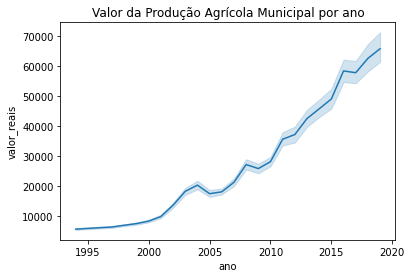

In [20]:
pam_plot = sns.lineplot(data=PAM, x="ano", y="valor_reais").set_title("Valor da Produção Agrícola Municipal por ano")
pam_plot.get_figure().savefig("./plots/pam_plot.jpg", dpi=300, format="jpg", bbox_inches="tight")
pam_plot;

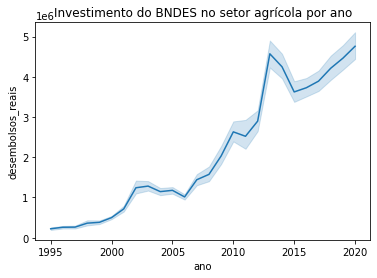

In [21]:
bndes_plot = sns.lineplot(data=agro_mun_bndes, x="ano", y="desembolsos_reais").set_title("Investimento do BNDES no setor agrícola por ano")
bndes_plot.get_figure().savefig("./plots/bndes_plot.jpg", dpi=300, format="jpg", bbox_inches="tight")
bndes_plot;

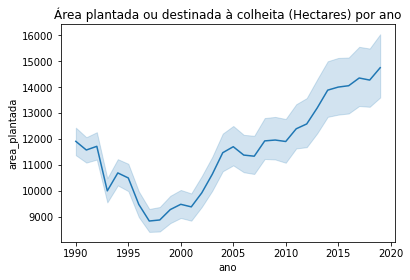

In [22]:
pam_plot = sns.lineplot(data=PAM, x="ano", y="area_plantada").set_title("Área plantada ou destinada à colheita (Hectares) por ano")
pam_plot.get_figure().savefig("./plots/plantada_plot.jpg", dpi=300, format="jpg", bbox_inches="tight")
pam_plot;

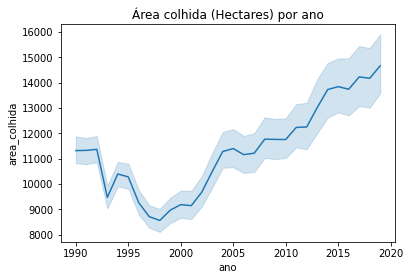

In [23]:
pam_plot = sns.lineplot(data=PAM, x="ano", y="area_colhida").set_title("Área colhida (Hectares) por ano")
pam_plot.get_figure().savefig("./plots/colhida_plot.jpg", dpi=300, format="jpg", bbox_inches="tight")
pam_plot;

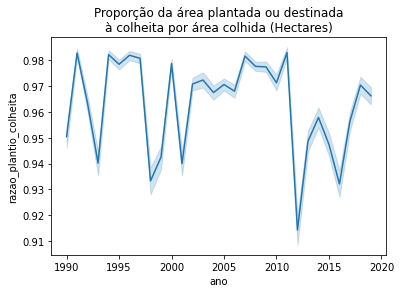

In [24]:
pam_plot = sns.lineplot(data=PAM, x="ano", y="razao_plantio_colheita").set_title("Proporção da área plantada ou destinada\nà colheita por área colhida (Hectares)")
pam_plot.get_figure().savefig("./plots/razao_plantio_colheita_plot.jpg", dpi=300, format="jpg", bbox_inches="tight")
pam_plot;

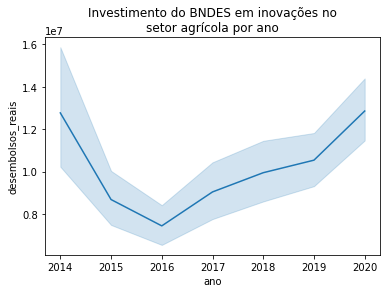

In [25]:
bndes_inov_plot = sns.lineplot(data=merge_df.loc[(merge_df["inovacao"] != 0) & (merge_df["ano"] > 2013)], x="ano", y="desembolsos_reais").set_title("Investimento do BNDES em inovações no\nsetor agrícola por ano")
bndes_inov_plot.get_figure().savefig("./plots/bndes_inov_plot.jpg", dpi=300, format="jpg", bbox_inches="tight")
bndes_inov_plot;

In [26]:
merge_inov = merge_df.loc[(merge_df["inovacao"] != 0) & (merge_df["ano"] > 2013)]

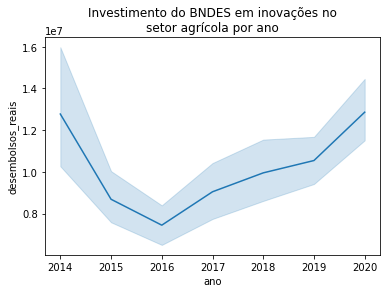

In [27]:
bndes_inov_plot = sns.lineplot(data=merge_inov, x="ano", y="desembolsos_reais").set_title("Investimento do BNDES em inovações no\nsetor agrícola por ano")
bndes_inov_plot.get_figure().savefig("./plots/bndes_inov_plot.jpg", dpi=300, format="jpg", bbox_inches="tight")
bndes_inov_plot;

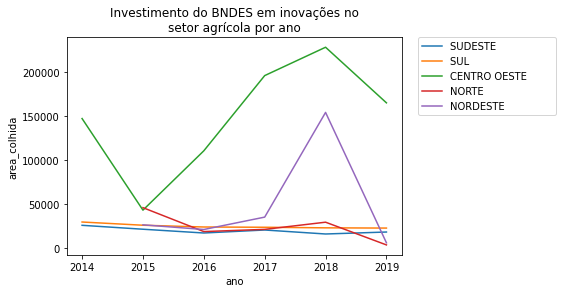

In [28]:
prod_colh_mun = sns.lineplot(data=merge_inov, x="ano", y="area_colhida", ci=None, hue="regiao").set_title("Investimento do BNDES em inovações no\nsetor agrícola por ano")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
prod_colh_mun.get_figure().savefig("./plots/prod_colh_mun.jpg", dpi=300, format="jpg", bbox_inches="tight")
prod_colh_mun;

In [41]:
df_estados = merge_df.groupby(["municipio_codigo", "uf", "regiao"]).agg(
                                inovacao=("inovacao", "sum")
                                 ).reset_index().sort_values(by="inovacao", ascending=False)

df_estados.regiao = df_estados.regiao.str.strip()

In [47]:
df_sul = df_estados.loc[df_estados.regiao == 'SUL'].sort_values(by="inovacao", ascending=False).head(10)
df_norte = df_estados.loc[df_estados.regiao == 'NORTE'].sort_values(by="inovacao", ascending=False).head(10)
df_sudeste = df_estados.loc[df_estados.regiao == 'SUDESTE'].sort_values(by="inovacao", ascending=False).head(10)
df_nordeste = df_estados.loc[df_estados.regiao == 'NORDESTE'].sort_values(by="inovacao", ascending=False).head(10)
df_centro_oeste = df_estados.loc[df_estados.regiao == 'CENTRO OESTE'].sort_values(by="inovacao", ascending=False).head(10)

In [73]:
df_codigos = pd.DataFrame()

df_codigos['municipio_codigo'] = list(list(df_sul.municipio_codigo) + list(df_norte.municipio_codigo) + list(df_nordeste.municipio_codigo) + list(df_sudeste.municipio_codigo) + list(df_centro_oeste.municipio_codigo))

df_codigos.to_csv('./data/top_10_mun_inovativos.csv')